# ML Task 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data.csv


In [3]:
countries=pd.read_csv('/content/Country-data.csv')
countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
# We get rid of the first column because we only need numerical values
data_for_clustering = countries.drop(['country'], axis=1)
data_for_clustering

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit(data_for_clustering).transform(data_for_clustering)

## **Exercise 1**

Determine the number of clusters in the set

In [9]:
from sklearn.cluster import KMeans

#### The elbow method

In [10]:
wcss_list = []

for k in range(1,10):
  kmeans_model = KMeans(n_clusters=k, random_state=7)
  kmeans_model.fit(data_scaled)
  wcss_list.append(kmeans_model.inertia_)

In [11]:
wcss_list

[1503.0000000000002,
 1051.1606393811185,
 831.424435208687,
 723.1180812735823,
 631.6013453646452,
 577.3061722793251,
 543.7741388540159,
 485.5539584167358,
 465.66788139444475]

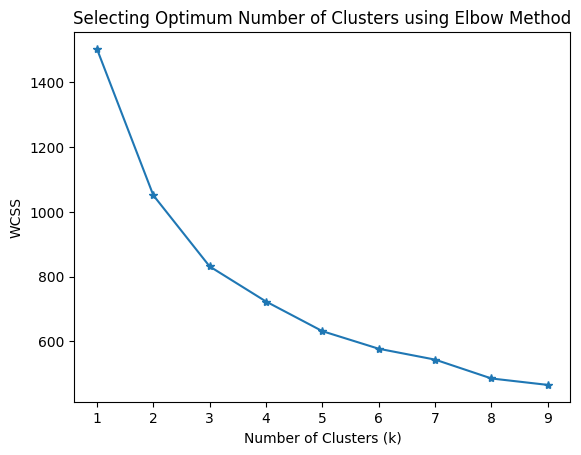

In [12]:
# Plot the inertia (WCSS) and number of clusters
plt.plot(range(1,10), wcss_list,  marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

#### The silhouette method

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
score_list = []

for i in range(2,10):
  kmeans_model = KMeans(n_clusters=i, random_state=7)
  kmeans_model.fit(data_scaled)
  pred = kmeans_model.predict(data_scaled)
  score = silhouette_score(data_scaled,pred)
  score_list.append(score)

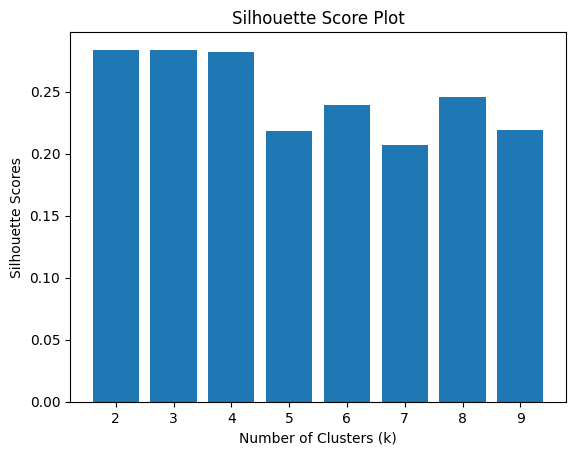

In [15]:
# Plot the Silhouette score and number of cluster
plt.bar(range(2, 10), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.show()

In [16]:
max_score=max(score_list)
max_index=score_list.index(max_score)
max_index+2 # because the index 0 corresponded to 2 clusters

2

We observe that the best option is `num_clusters=2`

## **Exercise 2**

Apply $k$-means

In [18]:
num_clusters = 2

In [19]:
# Create and fit the kMeans model
km = KMeans(n_clusters=num_clusters, random_state=7)
km.fit(data_scaled)
pred = km.predict(data_scaled)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [20]:
km.inertia_

1051.1606393811185

## **Exercise 3**

Apply hierarchical methods

### Linkage

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

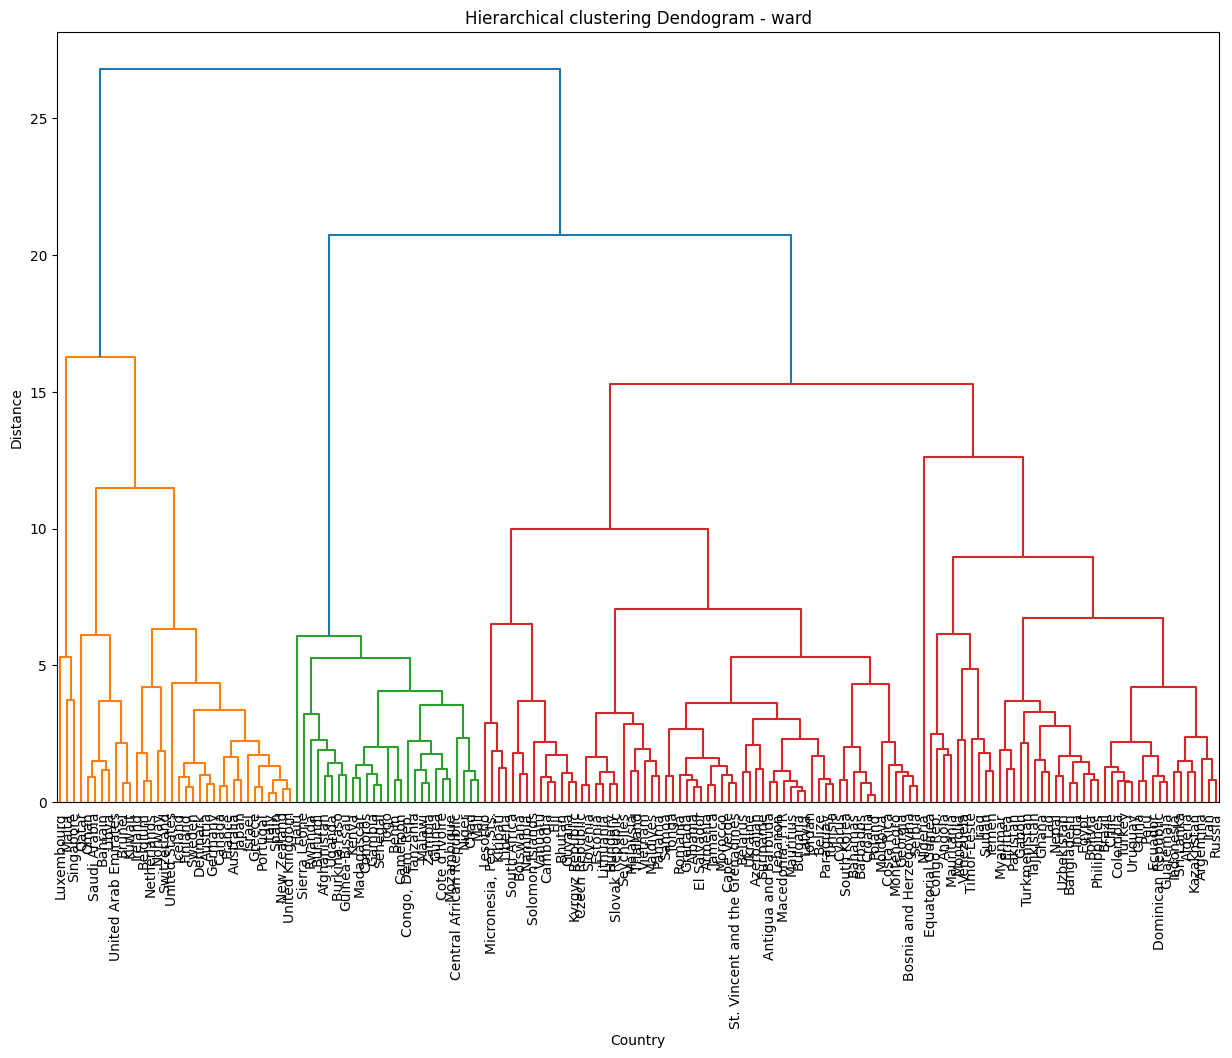

In [22]:
linkage_matrix=linkage(data_scaled, method='ward') # Ward’s method minimizes the variance within each cluster
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=countries['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical clustering Dendogram - ward")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

### Agglomerative clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
ac = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='complete')
pred = ac.fit_predict(data_scaled)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [25]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [26]:
silhouette_score(data_scaled, pred)

0.2725501366968193

In [27]:
silhouette_vals=silhouette_samples(data_scaled, pred)
silhouette_vals

array([ 0.48326117,  0.34136405,  0.19992308,  0.36985254,  0.38361695,
        0.23825968,  0.24999999,  0.36802023,  0.39564826,  0.19378012,
        0.39280357,  0.37715083,  0.03628816,  0.40214099,  0.28020981,
        0.35307098,  0.19501826,  0.43072449, -0.11793946,  0.0137862 ,
        0.31171401,  0.18007624,  0.26251464,  0.2812753 ,  0.37649498,
        0.48207721,  0.39570446,  0.05235145,  0.44580537,  0.37850152,
        0.13424003,  0.40819294,  0.45097652,  0.40939749,  0.3029862 ,
        0.28800333,  0.38400771,  0.44996958,  0.23715648,  0.33628725,
        0.45928543,  0.42494669,  0.4366493 ,  0.41582053,  0.35923329,
        0.21910521,  0.25664526,  0.06441671,  0.26338929,  0.20623633,
       -0.29770852,  0.37071005, -0.06944858,  0.41118113,  0.36451149,
       -0.18444673,  0.42450835,  0.23794559,  0.39395415,  0.38321348,
        0.40354759,  0.25459941,  0.03124709,  0.47822018,  0.45146427,
        0.01340659,  0.30641407,  0.34483201,  0.41353294, -0.08

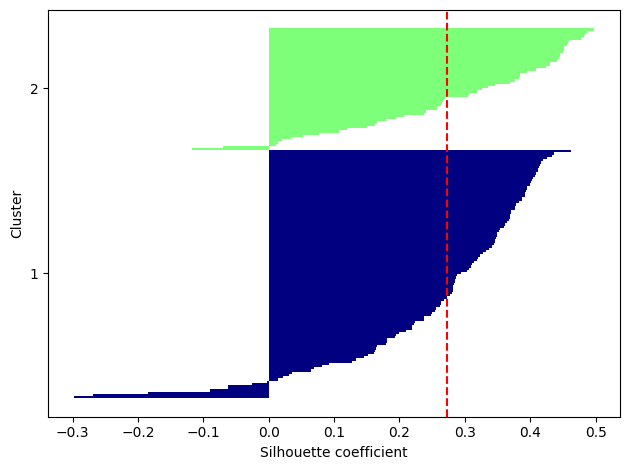

In [28]:
from matplotlib import cm
cluster_labels = np.unique(pred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / num_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

## **Exercise 4**

Print model's clusters

In [29]:
# I feel it's the same as Exercise 3
num_clusters = 2

km = KMeans(n_clusters=num_clusters, random_state=7)
km.fit(data_scaled)

KMeans(n_clusters=2, random_state=7)

In [30]:
pred = km.predict(data_scaled)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)

In [31]:
print(np.unique(pred))

[0 1]


In [37]:
data_for_clustering['Cluster']=pred

In [38]:
summary = data_for_clustering.groupby('Cluster').mean()
summary['Count'] = data_for_clustering['Cluster'].value_counts()
summary = summary.sort_values(by='Count', ascending=False)
summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Count
Cluster,,,,,,,,,,
1,11.895789,49.069474,7.443053,49.734737,26559.894737,4.762326,76.730526,1.918211,21065.894737,95
0,73.069444,30.605542,5.987917,43.137026,4721.847222,11.765903,62.408333,4.306667,2274.361111,72


## **Exercise 5**

Print the silhouette plot for a given clustering

In [39]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [40]:
silhouette_score(data_scaled,pred)

0.2838290818882378

In [41]:
silhouette_vals = silhouette_samples(data_scaled,pred)
silhouette_vals

array([ 0.45976596,  0.29795137,  0.04147956,  0.38624117,  0.37916423,
        0.14399166,  0.13725593,  0.37455679,  0.4318504 ,  0.06449728,
        0.39909833,  0.36686573,  0.13849752,  0.40752839,  0.23319409,
        0.39702463,  0.15673043,  0.43744601,  0.0532912 ,  0.1277953 ,
        0.3244517 ,  0.19494057,  0.19884316,  0.25614808,  0.36983569,
        0.46567895,  0.36416773,  0.09740741,  0.45048438,  0.40247597,
        0.06633546,  0.40688761,  0.43039542,  0.38195964,  0.18898365,
        0.21575368,  0.4063944 ,  0.42516119,  0.27953317,  0.3339505 ,
        0.44451995,  0.41907608,  0.44917684,  0.44612508,  0.39201531,
        0.10964848,  0.19124062,  0.10892177,  0.21040828,  0.21793474,
        0.3810391 ,  0.38453084, -0.0189394 ,  0.4341695 ,  0.38875436,
        0.2775013 ,  0.42814477,  0.22894108,  0.42579921,  0.43067049,
        0.41715847,  0.19796362,  0.06032179,  0.48023376,  0.42594736,
        0.03234167,  0.28934648,  0.3692173 ,  0.43939977,  0.24

In [42]:
from matplotlib import cm

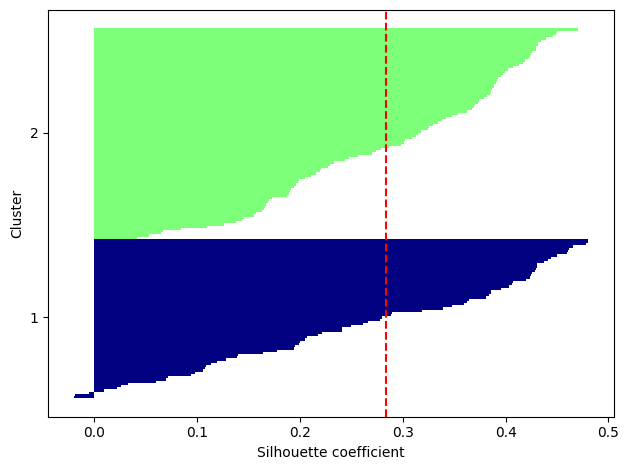

In [43]:
y_ax_lower, y_ax_upper = 0, 0 # vertical bounds of the bar plot for each cluster
                              # the range from y_ax_lower to y_ax_upper represents the vertical span for a given cluster
cluster_labels = np.unique(pred) # unique cluster labels
yticks = [] # vertical midpoint for each cluster's bar
for i, c in enumerate(cluster_labels):
    '''
    This loop creates horizontal bar plots for the silhouette values of each cluster,
    stacking them vertically for visualization. Each bar represents the silhouette values
    of points within a single cluster, sorted in ascending order.
    '''
    c_silhouette_vals = silhouette_vals[pred == c] # a list with all silhouettle values from the same cluster
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals) # moves the upper limit by the number of points in the current cluster
    color = cm.jet(float(i) / num_clusters) # assigns a unique color to each cluster based on its index
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.) # appends the vertical midpoint of the bar for labeling this cluster on the y-axis
    y_ax_lower += len(c_silhouette_vals) # updates the starting position for the next cluster (y_ax_lower=y_ax_upper, ONLY AT THIS POINT)

# Compute the average silhouette score across all clusters and plot it as a vertical dashed red line
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

## **Exercise 6**

Describe the clusters obtained

In [ ]:
km.cluster_centers_

array([[ 0.86548399, -0.38432146, -0.30226087, -0.15549526, -0.64634089,
         0.37803089, -0.91889134,  0.90021544, -0.58498102],
       [-0.65594576,  0.29127521,  0.22908193,  0.11784904,  0.48985836,
        -0.28650762,  0.69642291, -0.68226854,  0.44335404]])

In [ ]:
# data_for_clustering['Cluster']=pred
data_for_clustering.loc[:, 'Cluster'] = pred # better (avoids warnings)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [ ]:
print("Cluster Summary")
summary = data_for_clustering.groupby('Cluster').mean()
summary['Count'] = data_for_clustering['Cluster'].value_counts()
summary = summary.sort_values(by='Count', ascending=False)
summary

Cluster Summary


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Count
Cluster,,,,,,,,,,
1,11.895789,49.069474,7.443053,49.734737,26559.894737,4.762326,76.730526,1.918211,21065.894737,95
0,73.069444,30.605542,5.987917,43.137026,4721.847222,11.765903,62.408333,4.306667,2274.361111,72


Here, we see clear differences between the clusters. For example, we can take the income feature as a reference, where we see that countries in Cluster 1 have a much bigger income than those in Cluster 0. Thus, we can conlcude that Cluster 1 is for rich countries while Cluster 0 is for poor countries.